In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('nbastats.csv')


G (Games Played):   - number of games played by the player
GS (Games Started):   - number of games started by the player
MP (Minutes Played):   - total minutes played by the player
FG (Field Goals)- number of field goals made by the player
FGA (Field Goal Attempts) - number of field goal attempts by the player
FG% (Field Goal Percentage):    - percentage of field goals made by the player
3P (3-Point Field Goals):   - number of 3-point field goals made by the player
3PA (3-Point Field Goal Attempts):   - number of 3-point field goal attempts by the player
3P% (3-Point Field Goal Percentage):    - percentage of 3-point field goals made by the player
2P (2-Point Field Goals):   - number of 2-point field goals made by the player
2PA (2-point Field Goal Attempts):   - number of 2-point field goal attempts by the player
2P% (2-Point Field Goal Percentage):    - percentage of 2-point field goals made by the player
eFG% (Effective Field Goal Percentage):    - effective field goal percentage of the player
FT (Free Throws):   - number of free throws made by the player
FTA (Free Throw Attempts):   - number of free throw attempts by the player
FT% (Free Throw Percentage):    - percentage of free throws made by the player
ORB (Offensive Rebounds):   - number of offensive rebounds by the player
DRB (Defensive Rebounds):   - number of defensive rebounds by the player
TRB (Total Rebounds):   - total rebounds by the player
AST (Assists):   - number of assists made by the player
STL (Steals):   - number of steals made by the player
BLK (Blocks):   - number of blocks made by the player
TOV (Turnovers):   - number of turnovers made by the player
PF (Personal Fouls):   - number of personal fouls made by the player
PTS (Points):   - total points scored by the player
* after name = he is a Hall of Famer (https://en.wikipedia.org/wiki/List_of_players_in_the_Naismith_Memorial_Basketball_Hall_of_Fame)

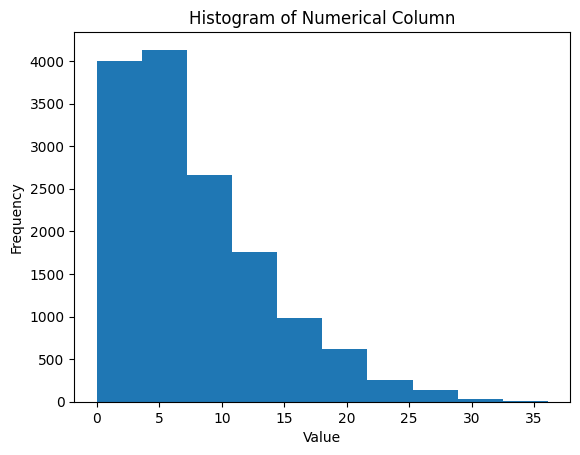

In [6]:
plt.hist(df['PTS'], bins=10)
plt.title('Histogram of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [18]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         88
3P           0
3PA          0
3P%       2198
2P           0
2PA          0
2P%        154
eFG%        88
FT           0
FTA          0
FT%        749
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Season       0
MVP          0
dtype: int64


Toate campurile lipsa sunt procentaje, sunt missing values deoarece jucatorul nu are nici o aruncare din categoria respectiva ( a jucat foarte putine minute )
De aceea se pot completa cu 0

In [19]:
df['FG%'].fillna(0, inplace=True)
df['3P%'].fillna(0, inplace=True)
df['2P%'].fillna(0, inplace=True)
df['eFG%'].fillna(0, inplace=True)
df['FT%'].fillna(0, inplace=True)

C:\Users\Iulian\AppData\Local\Temp\ipykernel_11004\900043586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FG%'].fillna(0, inplace=True)
C:\Users\Iulian\AppData\Local\Temp\ipykernel_11004\900043586.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

In [5]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Season    0
MVP       0
dtype: int64


Jucatorii care au doar 1 meci jucat sau au mai putin de 1 minut average jucat pot fi considerati anomalii

In [20]:
df_filtered = df[df['G'] > 1]
df_filtered = df_filtered[df_filtered['MP'] >= 1]


Transformare din True si False in 1 si 0

In [21]:
df['MVP'] = df['MVP'].astype(int)
df['MVP'] = df['MVP'].replace({'True': 1, 'False': 0})
print(df.head())

   Rk               Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  DRB  \
0   1   Mahmoud Abdul-Rauf  PG   28  SAC  31   0  17.1  3.3   8.8  ...  1.0   
1   2    Tariq Abdul-Wahad  SG   23  SAC  59  16  16.3  2.4   6.1  ...  1.2   
2   3  Shareef Abdur-Rahim  SF   21  VAN  82  82  36.0  8.0  16.4  ...  4.3   
3   4       Cory Alexander  PG   24  TOT  60  22  21.6  2.9   6.7  ...  2.2   
4   4       Cory Alexander  PG   24  SAS  37   3  13.5  1.6   3.9  ...  1.1   

   TRB  AST  STL  BLK  TOV   PF   PTS   Season  MVP  
0  1.2  1.9  0.5  0.0  0.6  1.0   7.3  1997-98    0  
1  2.0  0.9  0.6  0.2  1.1  1.4   6.4  1997-98    0  
2  7.1  2.6  1.1  0.9  3.1  2.5  22.3  1997-98    0  
3  2.4  3.5  1.2  0.2  1.9  1.6   8.1  1997-98    0  
4  1.3  1.9  0.7  0.1  1.3  1.4   4.5  1997-98    0  

[5 rows x 32 columns]


Stergere * din numa ( reprezinta membrii din Hall of Fame, premium acordat jucatorilor legendari dupa retragere )

In [22]:
df['Player'] = df['Player'].str.rstrip('*')

In [26]:
df.corr(numeric_only=True)

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,MVP
Rk,1.000000,-0.045245,-0.047194,-0.039766,-0.029845,-0.007366,-0.007961,0.011221,0.012412,0.018469,...,-0.029955,-0.011646,-0.018631,0.006168,-0.020428,-0.008842,-0.009217,-0.025242,-0.010530,-0.012298
Age,-0.045245,1.000000,0.035951,0.043532,0.093326,0.010772,0.018025,-0.011968,0.065222,0.050970,...,-0.019724,0.064084,0.039968,0.098077,0.043461,-0.019892,0.017241,0.062690,0.014508,0.003651
G,-0.047194,0.035951,1.000000,0.648261,0.623975,0.531373,0.508865,0.269591,0.296636,0.278043,...,0.342314,0.476754,0.459453,0.363731,0.452040,0.291432,0.443324,0.514781,0.522562,0.047719
GS,-0.039766,0.043532,0.648261,1.000000,0.794120,0.734992,0.714500,0.216083,0.356668,0.348973,...,0.440254,0.652642,0.619527,0.534624,0.592471,0.391438,0.650691,0.571263,0.724283,0.082855
MP,-0.029845,0.093326,0.623975,0.794120,1.000000,0.895629,0.901854,0.235876,0.531919,0.538459,...,0.457966,0.741689,0.689925,0.677912,0.760200,0.385371,0.809594,0.718361,0.892639,0.071262
FG,-0.007366,0.010772,0.531373,0.734992,0.895629,1.000000,0.979802,0.297303,0.530590,0.532726,...,0.433121,0.718668,0.665001,0.643298,0.672606,0.369971,0.826087,0.606987,0.989703,0.128136
FGA,-0.007961,0.018025,0.508865,0.714500,0.901854,0.979802,1.000000,0.165863,0.600205,0.618180,...,0.343854,0.660511,0.593268,0.681270,0.697065,0.292657,0.836994,0.575431,0.980942,0.113092
FG%,0.011221,-0.011968,0.269591,0.216083,0.235876,0.297303,0.165863,1.000000,-0.032340,-0.090701,...,0.382687,0.335516,0.370205,0.048458,0.123139,0.323801,0.166741,0.322198,0.260324,0.028920
3P,0.012412,0.065222,0.296636,0.356668,0.531919,0.530590,0.600205,-0.032340,1.000000,0.980225,...,-0.205189,0.192508,0.071872,0.477858,0.434809,-0.104908,0.396003,0.176764,0.589189,0.053029
3PA,0.018469,0.050970,0.278043,0.348973,0.538459,0.532726,0.618180,-0.090701,0.980225,1.000000,...,-0.217692,0.190660,0.066407,0.503454,0.456709,-0.113837,0.419038,0.171149,0.591566,0.050654


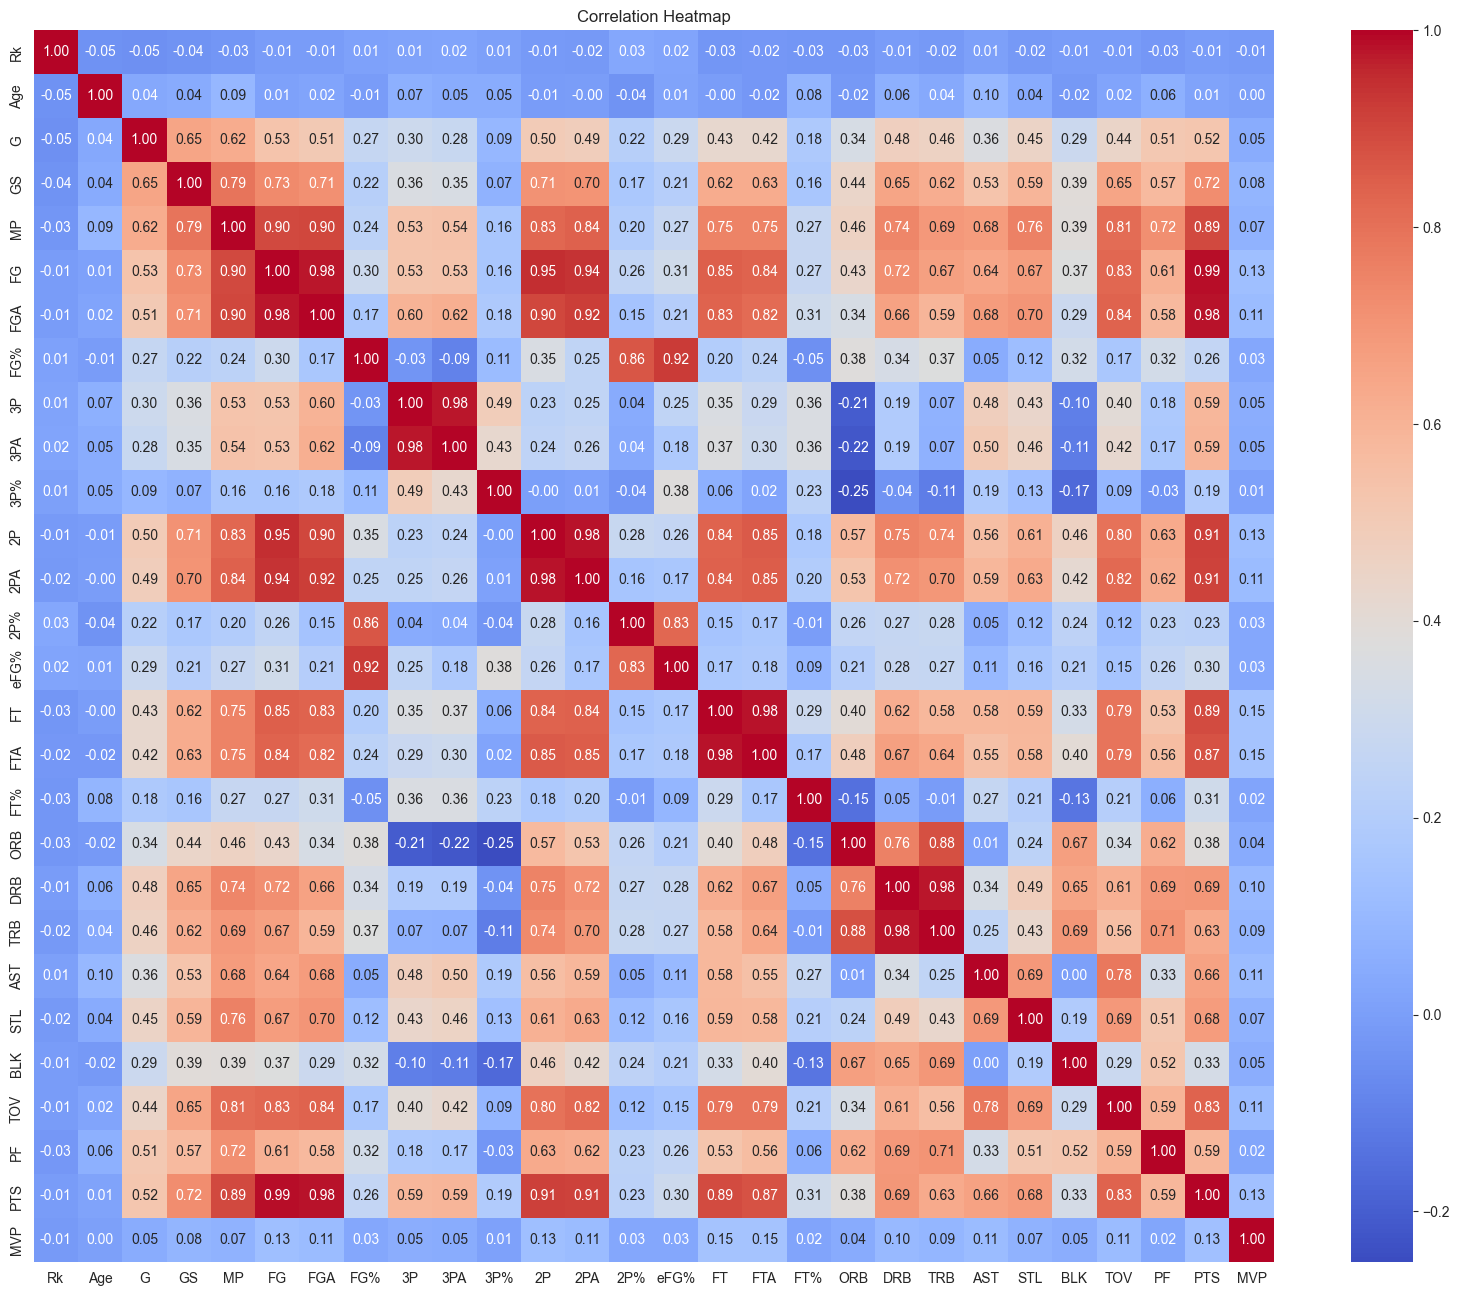

In [27]:



# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Corelatii intre FG FGA , 2P 2PA ... pentru ca masoara acelasi stat mai mult sau mai putin unul reprezinta aruncarile reusite , celalalt aruncarile incercate de la o anumita distanta , inside the arc , 3 pointer , free throw
Corelatie intre Field goals attempted si toate tipurile de aruncari
Total Rebounds si Offensive/Defensive Rebounds

FGA ( field goals attempted ) are corelatie cu toate stats-urile legate de aruncari

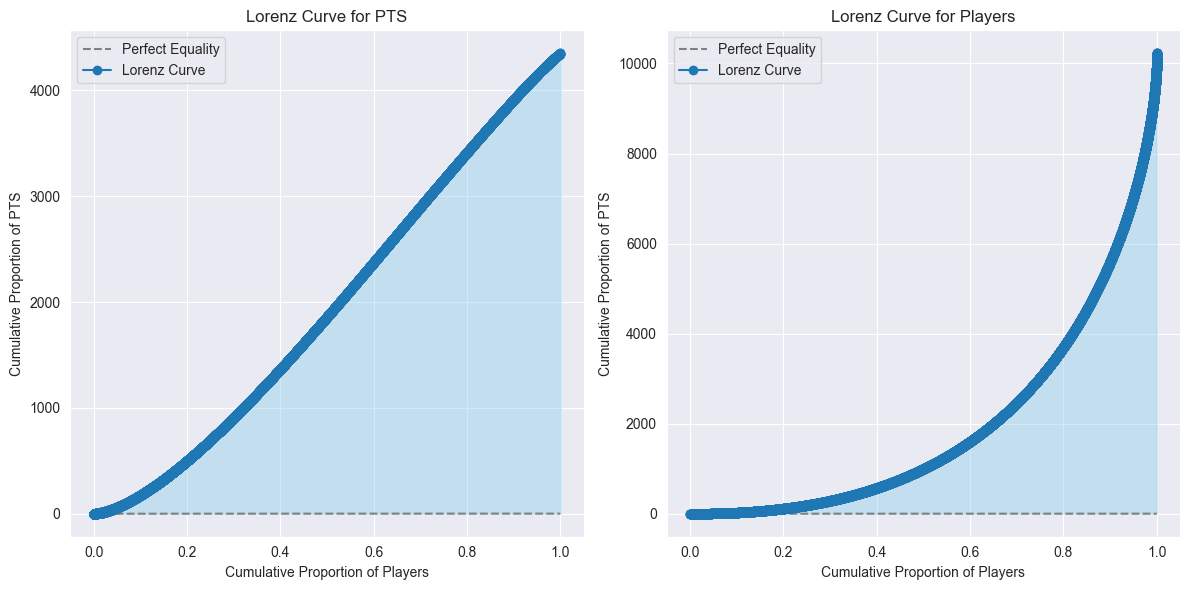

Gini index for PTS: -1.0000000000000053
Gini index for Players: -1.0000000000000013


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Calculate the Gini index for points (PTS)
sorted_df_pts = df.sort_values(by='PTS')
sorted_df_pts['Cumulative_PTS'] = sorted_df_pts['PTS'].cumsum() / sorted_df_pts['PTS'].sum()
sorted_df_pts['Lorenz_Curve'] = sorted_df_pts['Cumulative_PTS'] - sorted_df_pts['Cumulative_PTS'].shift(1, fill_value=0)
gini_index_pts = 1 - (2 * sorted_df_pts['Lorenz_Curve'].sum())

# Calculate the Gini index for players
sorted_df_players = df.sort_values(by='PTS', ascending=False)
sorted_df_players['Cumulative_Players'] = sorted_df_players['PTS'].cumsum() / sorted_df_players['PTS'].sum()
sorted_df_players['Lorenz_Curve'] = sorted_df_players['Cumulative_Players'] - sorted_df_players['Cumulative_Players'].shift(1, fill_value=0)
gini_index_players = 1 - (2 * sorted_df_players['Lorenz_Curve'].sum())

# Plot the Lorenz curves
plt.figure(figsize=(12, 6))

# Lorenz curve for points (PTS)
plt.subplot(1, 2, 1)
plt.plot(sorted_df_pts['Cumulative_PTS'], sorted_df_pts['Cumulative_PTS'], linestyle='--', color='gray', label='Perfect Equality')
plt.plot(sorted_df_pts['Cumulative_PTS'], sorted_df_pts['Cumulative_PTS'].cumsum(), marker='o', label='Lorenz Curve')
plt.fill_between(sorted_df_pts['Cumulative_PTS'], sorted_df_pts['Cumulative_PTS'], sorted_df_pts['Cumulative_PTS'].cumsum(), color='skyblue', alpha=0.4)
plt.xlabel('Cumulative Proportion of Players')
plt.ylabel('Cumulative Proportion of PTS')
plt.title('Lorenz Curve for PTS')
plt.legend()
plt.grid(True)

# Lorenz curve for players
plt.subplot(1, 2, 2)
plt.plot(sorted_df_players['Cumulative_Players'], sorted_df_players['Cumulative_Players'], linestyle='--', color='gray', label='Perfect Equality')
plt.plot(sorted_df_players['Cumulative_Players'], sorted_df_players['Cumulative_Players'].cumsum(), marker='o', label='Lorenz Curve')
plt.fill_between(sorted_df_players['Cumulative_Players'], sorted_df_players['Cumulative_Players'], sorted_df_players['Cumulative_Players'].cumsum(), color='skyblue', alpha=0.4)
plt.xlabel('Cumulative Proportion of Players')
plt.ylabel('Cumulative Proportion of PTS')
plt.title('Lorenz Curve for Players')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Gini index for PTS:", gini_index_pts)
print("Gini index for Players:", gini_index_players)


In [34]:


# Assuming df is your DataFrame containing the dataset

# Calculate entropy for each column
entropies = {}
for column in df.columns:
    # Skip non-numeric columns like 'Player', 'Pos', 'Tm', 'Season', etc.
    if df[column].dtype == 'object':
        continue

    # Calculate the probabilities of each unique value in the column
    value_counts = df[column].value_counts(normalize=True)
    probabilities = value_counts.values

    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))

    # Store the entropy for the column
    entropies[column] = entropy

# Display the entropy for each column
for column, entropy in entropies.items():
    print(f"Entropy for {column}: {entropy}")


Entropy for Rk: 9.005042710496605
Entropy for Age: 4.052475451727115
Entropy for G: 6.270871138424956
Entropy for GS: 5.092080278694366
Entropy for MP: 8.51980528076983
Entropy for FG: 6.1917156891442735
Entropy for FGA: 7.284375979393417
Entropy for FG%: 8.061505651284124
Entropy for 3P: 3.878876892410925
Entropy for 3PA: 5.261190078768143
Entropy for 3P%: 7.1139517881372205
Entropy for 2P: 5.918635452421754
Entropy for 2PA: 6.913624607361787
Entropy for 2P%: 8.06421192715853
Entropy for eFG%: 8.095819598149028
Entropy for FT: 5.256131468237285
Entropy for FTA: 5.632063651134477
Entropy for FT%: 8.23900118263888
Entropy for ORB: 4.636758131995784
Entropy for DRB: 5.927821741842318
Entropy for TRB: 6.36498612301156
Entropy for AST: 5.582304127200074
Entropy for STL: 4.0020533894852734
Entropy for BLK: 3.5511265720317247
Entropy for TOV: 4.793406135351998
Entropy for PF: 5.039907851421589
Entropy for PTS: 7.588436720778714
Entropy for MVP: 0.018233395579560704


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming df is your preprocessed DataFrame with features and target variable

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['MVP','Player','Pos','Tm','Season'])
y = df['MVP']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize three different models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print model evaluation
    print(f"{name} Accuracy: {accuracy:.4f}")


Decision Tree Accuracy: 0.9973
Random Forest Accuracy: 0.9983


In [13]:
from sklearn.naive_bayes import GaussianNB

# For classification
# Assuming you still want to predict MVP status
# Split the dataset into features (X) and target variable (y) for classification
X_classification = df.drop(columns=['MVP','Player','Pos','Tm','Season'])
y_classification = df['MVP']  # Target variable (MVP status)

# Train and evaluate Naive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_classification, y_classification)
y_pred_classification_nb = naive_bayes.predict(X_classification)

# Calculate accuracy for Naive Bayes classifier
accuracy_classification_nb = accuracy_score(y_classification, y_pred_classification_nb)
print(f"Naive Bayes Accuracy: {accuracy_classification_nb:.4f}")


Naive Bayes Accuracy: 0.9371


In [23]:
# Minimum and maximum values of the target variable
min_total_pra = y_regression.min()
max_total_pra = y_regression.max()

# Print the range of the target variable
print(f"Range of Total_PRA: {min_total_pra} to {max_total_pra}")

# Summary statistics of the target variable
print(f"Mean of Total_PRA: {y_regression.mean()}")
print(f"Standard deviation of Total_PRA: {y_regression.std()}")


Range of Total_PRA: 0.0 to 52.699999999999996
Mean of Total_PRA: 13.041123996431757
Standard deviation of Total_PRA: 8.763676830764604
